Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2671 - accuracy: 0.9194 - val_loss: 0.1116 - val_accuracy: 0.9657
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0805 - val_accuracy: 0.9743
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0752 - accuracy: 0.9767 - val_loss: 0.0710 - val_accuracy: 0.9761
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0664 - val_accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0628 - val_accuracy: 0.9807
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0766 - val_accuracy: 0.9791
Epoch 7/10
60000/60000 [===========================

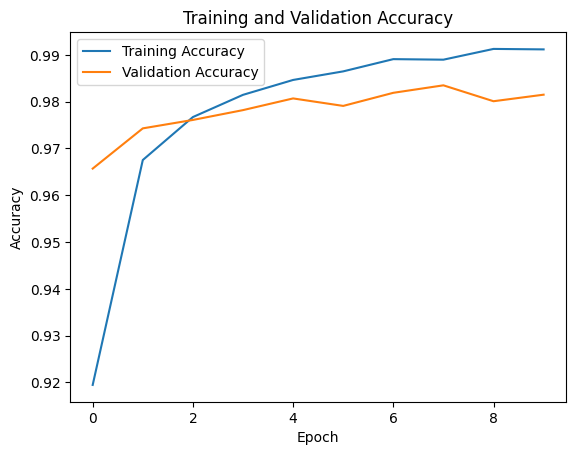

In [36]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def MLP():
    # Define input layer
    inputs = Input(shape=(28 * 28,))

    # Define hidden layers
    dense1 = Dense(512, activation='relu')(inputs)
    dropout1 = Dropout(0.2)(dense1)
    dense2 = Dense(256, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)

    # Define output layer
    outputs = Dense(10, activation='softmax')(dropout2)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create MLP model
model = MLP()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28 * 28)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model and collect history
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


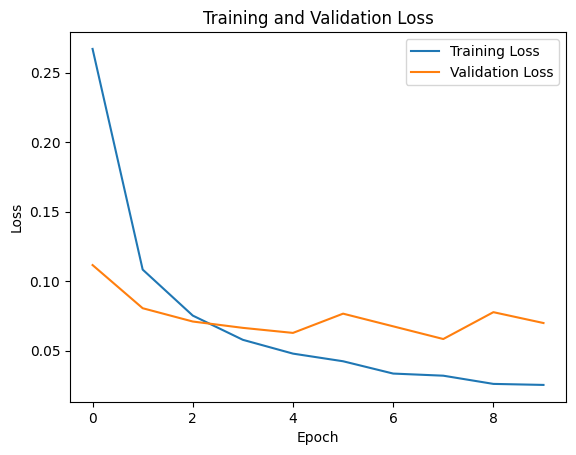

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()